In [1]:
# Gym stuff
import gym
import gym_anytrading
# Stable baselines - rl stuff
from stable_baselines3.common.vec_env import DummyVecEnv
from stable_baselines3 import A2C, PPO

# Processing libraries
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

from trader import trader_agent
import cryptomanager as cm
test = trader_agent()

In [2]:
df = cm.historical_data_df(days_delta=10000)
print(df.dtypes)
df

1995-06-15 00:00:00
date     datetime64[ns, UTC]
Open                 float64
High                 float64
Low                  float64
Close                float64
dtype: object


,date,Open,High,Low,Close
0,2020-04-08 08:09:00+00:00,7314.0,7314.0,7314.0,7314.0
1,2020-04-14 06:31:00+00:00,7101.5,7101.5,7101.5,7101.5
2,2020-04-14 07:55:00+00:00,7100.0,7100.0,7100.0,7100.0
3,2020-04-22 23:29:00+00:00,7118.5,7118.5,7118.5,7118.5
4,2020-04-28 12:28:00+00:00,7748.5,7748.5,7748.5,7748.5
...,...,...,...,...,...
576646,2022-11-01 01:53:00+00:00,20500.0,20500.0,20495.0,20500.0
576647,2022-11-01 01:54:00+00:00,20500.0,20500.0,20497.0,20499.0
576648,2022-11-01 01:57:00+00:00,20498.0,20499.0,20498.0,20499.0
576649,2022-11-01 01:58:00+00:00,20499.0,20499.0,20499.0,20499.0


In [3]:
# df = pd.read_csv("data/gmedata.csv")
env = gym.make('forex-v0', df=df, frame_bound=(5,len(df)), window_size=5)
df

,date,Open,High,Low,Close
0,2020-04-08 08:09:00+00:00,7314.0,7314.0,7314.0,7314.0
1,2020-04-14 06:31:00+00:00,7101.5,7101.5,7101.5,7101.5
2,2020-04-14 07:55:00+00:00,7100.0,7100.0,7100.0,7100.0
3,2020-04-22 23:29:00+00:00,7118.5,7118.5,7118.5,7118.5
4,2020-04-28 12:28:00+00:00,7748.5,7748.5,7748.5,7748.5
...,...,...,...,...,...
576646,2022-11-01 01:53:00+00:00,20500.0,20500.0,20495.0,20500.0
576647,2022-11-01 01:54:00+00:00,20500.0,20500.0,20497.0,20499.0
576648,2022-11-01 01:57:00+00:00,20498.0,20499.0,20498.0,20499.0
576649,2022-11-01 01:58:00+00:00,20499.0,20499.0,20499.0,20499.0


info {'total_reward': -44205000.0, 'total_profit': 0.5068016272550963, 'position': 0}


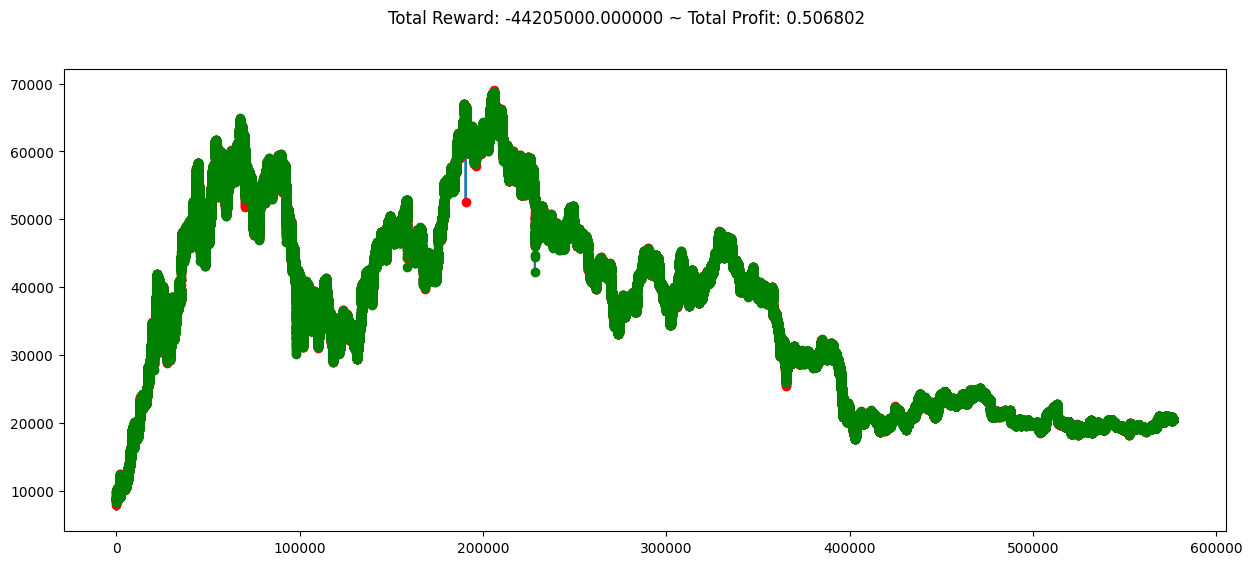

In [4]:
# Examining the model

state = env.reset()
while True: 
    # add a bit of randomness
    action = env.action_space.sample()
    n_state, reward, done, info = env.step(action)
    if done: 
        print("info", info)
        break
        
plt.figure(figsize=(15,6))
plt.cla()
env.render_all()
plt.show()

In [5]:
!pip install finta

In [6]:
from gym_anytrading.envs import StocksEnv
from finta import TA

In [7]:
# df['OBV'] = TA.OBV(df)
df['EMA'] = TA.EMA(df, 200)
df['RSI'] = TA.RSI(df)
df.fillna(0, inplace=True)
df = df.join(TA.MACD(df))
df

,date,Open,High,Low,Close,EMA,RSI,MACD,SIGNAL
0,2020-04-08 08:09:00+00:00,7314.0,7314.0,7314.0,7314.0,7314.000000,0.000000,0.000000,0.000000
1,2020-04-14 06:31:00+00:00,7101.5,7101.5,7101.5,7101.5,7207.218750,0.000000,-4.767628,-2.648682
2,2020-04-14 07:55:00+00:00,7100.0,7100.0,7100.0,7100.0,7171.121178,0.000000,-6.121420,-4.071935
3,2020-04-22 23:29:00+00:00,7118.5,7118.5,7118.5,7118.5,7157.767900,9.107921,-5.919194,-4.697701
4,2020-04-28 12:28:00+00:00,7748.5,7748.5,7748.5,7748.5,7278.289003,79.058101,19.384455,2.466196
...,...,...,...,...,...,...,...,...,...
576646,2022-11-01 01:53:00+00:00,20500.0,20500.0,20495.0,20500.0,20472.752730,44.190150,0.783927,4.730313
576647,2022-11-01 01:54:00+00:00,20500.0,20500.0,20497.0,20499.0,20473.013897,43.497041,-0.024983,3.779254
576648,2022-11-01 01:57:00+00:00,20498.0,20499.0,20498.0,20499.0,20473.272466,43.497041,-0.658460,2.891711
576649,2022-11-01 01:58:00+00:00,20499.0,20499.0,20499.0,20499.0,20473.528461,43.497041,-1.147270,2.083915


In [8]:
df.head(15)

,date,Open,High,Low,Close,EMA,RSI,MACD,SIGNAL
0,2020-04-08 08:09:00+00:00,7314.0,7314.0,7314.0,7314.0,7314.000000,0.000000,0.000000,0.000000
1,2020-04-14 06:31:00+00:00,7101.5,7101.5,7101.5,7101.5,7207.218750,0.000000,-4.767628,-2.648682
2,2020-04-14 07:55:00+00:00,7100.0,7100.0,7100.0,7100.0,7171.121178,0.000000,-6.121420,-4.071935
3,2020-04-22 23:29:00+00:00,7118.5,7118.5,7118.5,7118.5,7157.767900,9.107921,-5.919194,-4.697701
4,2020-04-28 12:28:00+00:00,7748.5,7748.5,7748.5,7748.5,7278.289003,79.058101,19.384455,2.466196
5,2020-04-29 03:18:00+00:00,7836.0,7836.0,7836.0,7836.0,7373.580045,81.219889,37.972569,12.090397
6,2020-04-30 12:48:00+00:00,8829.0,8829.0,8829.0,8829.0,7587.786410,91.696109,94.223816,32.876174
7,2020-04-30 12:56:00+00:00,8734.5,8734.5,8734.5,8734.5,7736.192393,86.737276,125.932608,55.239385
8,2020-05-01 00:00:00+00:00,8653.0,8653.0,8653.0,8653.0,7842.181898,82.589058,141.930720,75.265514
9,2020-05-01 05:31:00+00:00,8826.5,8826.5,8826.5,8826.5,7945.101892,84.309425,160.151292,94.284856


In [9]:
def add_signals(env):
    start = env.frame_bound[0] - env.window_size
    end = env.frame_bound[1]
    prices = env.df.loc[:, 'Low'].to_numpy()[start:end]
    signal_features = env.df.loc[:, ['Low','EMA',"MACD","SIGNAL", 'RSI']].to_numpy()[start:end]
    return prices, signal_features

In [10]:

class Cypto_Env(StocksEnv):
    _process_data = add_signals
    
env2 = Cypto_Env(df=df, window_size=12, frame_bound=(12,len(df)))

In [11]:
env2.signal_features

array([[ 7.31400000e+03,  7.31400000e+03,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00],
       [ 7.10150000e+03,  7.20721875e+03, -4.76762821e+00,
        -2.64868234e+00,  0.00000000e+00],
       [ 7.10000000e+03,  7.17112118e+03, -6.12141956e+00,
        -4.07193529e+00,  0.00000000e+00],
       ...,
       [ 2.04980000e+04,  2.04732725e+04, -6.58459953e-01,
         2.89171108e+00,  4.34970415e+01],
       [ 2.04990000e+04,  2.04735285e+04, -1.14726984e+00,
         2.08391489e+00,  4.34970415e+01],
       [ 2.05010000e+04,  2.04738715e+04, -7.99217526e-01,
         1.50728841e+00,  5.19658537e+01]])

In [12]:
df.head()

,date,Open,High,Low,Close,EMA,RSI,MACD,SIGNAL
0,2020-04-08 08:09:00+00:00,7314.0,7314.0,7314.0,7314.0,7314.000000,0.000000,0.000000,0.000000
1,2020-04-14 06:31:00+00:00,7101.5,7101.5,7101.5,7101.5,7207.218750,0.000000,-4.767628,-2.648682
2,2020-04-14 07:55:00+00:00,7100.0,7100.0,7100.0,7100.0,7171.121178,0.000000,-6.121420,-4.071935
3,2020-04-22 23:29:00+00:00,7118.5,7118.5,7118.5,7118.5,7157.767900,9.107921,-5.919194,-4.697701
4,2020-04-28 12:28:00+00:00,7748.5,7748.5,7748.5,7748.5,7278.289003,79.058101,19.384455,2.466196


In [13]:
from config import LOG_PATH, MODEL_PATH
from datetime import datetime
import os
 
env_maker = lambda: env2
env = DummyVecEnv([env_maker])

In [38]:
from config import LOG_PATH, MODEL_PATH
from datetime import datetime
import os
 
# model = A2C('MlpPolicy', env, verbose=1, tensorboard_log=LOG_PATH, device="cuda") 

model = A2C.load(path=os.path.join("data","model","2022-31-10-18-39-1.zip"),env=env, device="auto")
# name = str(datetime.now().strftime("%Y-%d-%m-%H-%M") )
# print(name)
# episodes = 50
# step_count = 100000
# for i in range (episodes):
#     model.learn(total_timesteps=step_count, tb_log_name=f"A2C - {name}")
#     model.save(f"{os.path.join(MODEL_PATH , name)} -{i + 1}.zip")

info {'total_reward': -44205000.0, 'total_profit': 0.5068016272550963, 'position': 0}


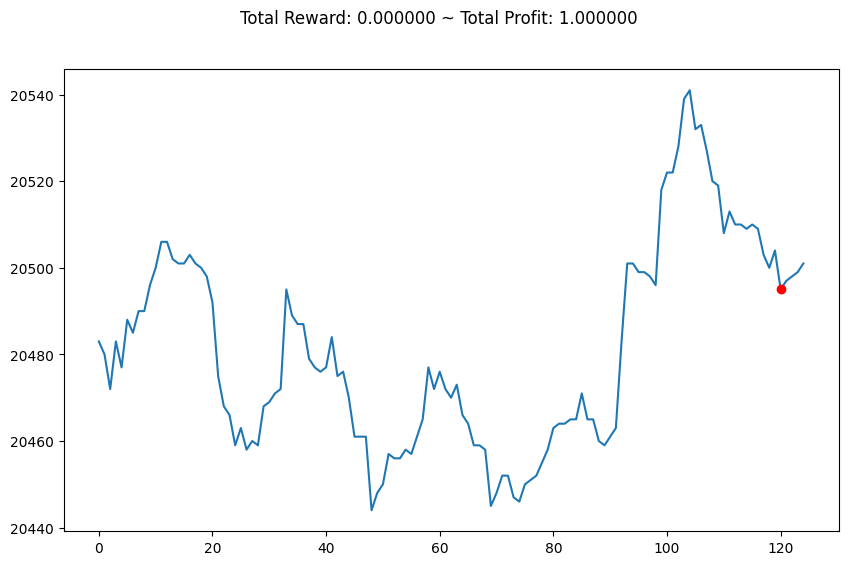

info {'total_reward': -44205000.0, 'total_profit': 0.5068016272550963, 'position': 0}


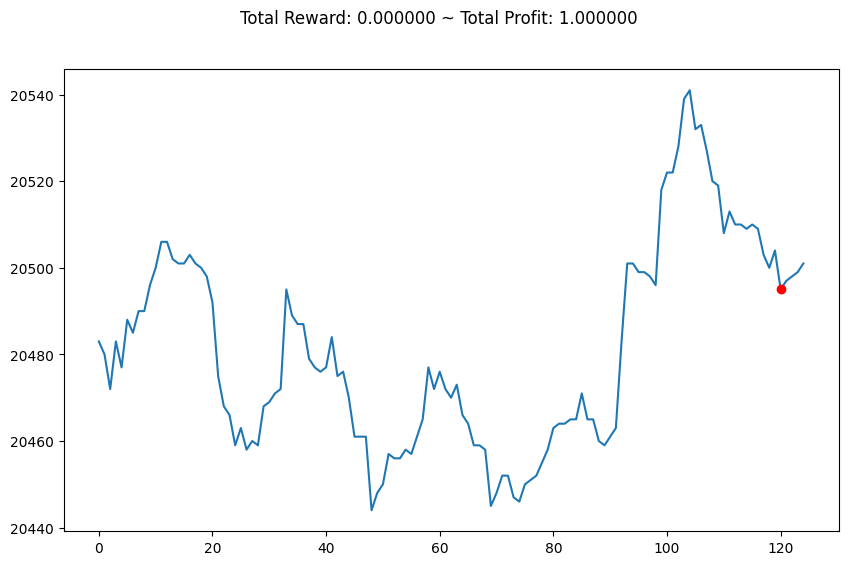

info {'total_reward': -44205000.0, 'total_profit': 0.5068016272550963, 'position': 0}


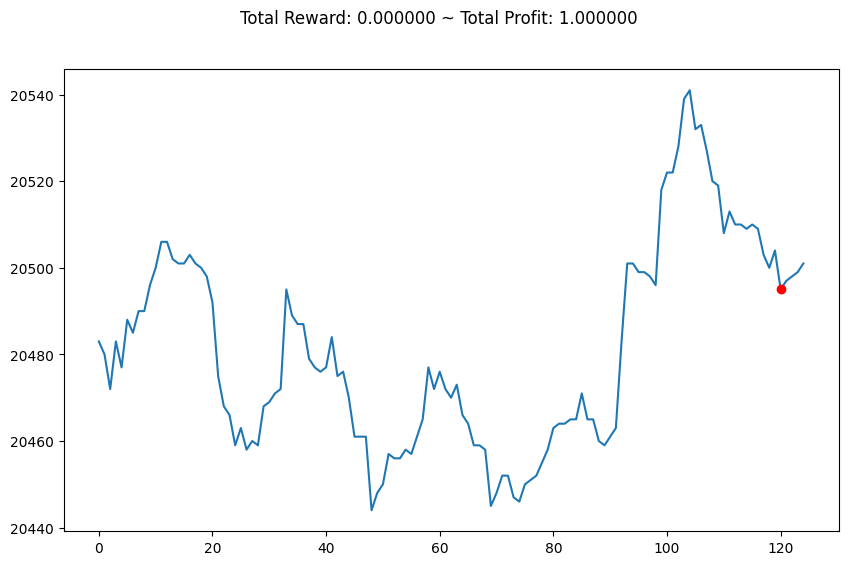

In [39]:
from IPython.display import clear_output
from trader import  trader_agent
import time
import os
trade_me = trader_agent()
prev_min = 0
clear = lambda: os.system('cls')

# clear()
df
env = Cypto_Env(df=df, window_size=120, frame_bound=(len(df)-5,len(df)))
obs = env.reset()
while True: 
    try:
        cur_min = datetime.now().minute
        if cur_min > prev_min or cur_min == 1:
            next_df = cm.historical_data_df()
            next_df = next_df.loc[-100:]
            next_df['EMA'] = TA.EMA(next_df, 200)
            next_df['RSI'] = TA.RSI(next_df)
            next_df.fillna(0, inplace=True)
            next_df = next_df.join(TA.MACD(next_df))
            prev_min = cur_min
            env.df = df.join(next_df)
            obs = env.reset()

            obs = obs[np.newaxis, ...]
            # print("1", obs)
            action, _states = model.predict(obs)
            # print(_states)
            if action == 1:
                trade_me.buy_position_at_market("BTC/USD")
                # print("b")
            else:
                trade_me.sell_position_market("BTCUSD")
                # print("s")
            obs, rewards, done, info = env.step(action)
            # print("2",obs)
            print(info)
            # clear_output()
    except:
        print("info", info)
        plt.figure(figsize=(10,6))
        plt.cla()
        env.render_all()
        plt.show()

In [ ]:
plt.figure(figsize=(15,6))
plt.cla()
env.render_all()
plt.show()